# Plot frequency errors by delay type for natural H3N2 populations 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style("ticks")

## Compare tip frequencies

Count the number of tips present at non-zero frequency in the "no delay" analysis compared to the number of tips with "ideal" and "realistic" delays. Additionally, compare the frequencies of tips that are present in the latter two analyses with the "no delay" analysis.

In [3]:
no_delay_tips = pd.read_csv(
    "../results/builds/natural/h3n2_no_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "clade_membership", "frequency"],
)

In [4]:
ideal_delay_tips = pd.read_csv(
    "../results/builds/natural/h3n2_ideal_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "clade_membership", "frequency"],
)

In [5]:
realistic_delay_tips = pd.read_csv(
    "../results/builds/natural/h3n2_observed_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "clade_membership", "frequency"],
)

In [6]:
no_delay_tips.shape

(30432, 4)

In [7]:
ideal_delay_tips.shape

(30189, 4)

In [8]:
realistic_delay_tips.shape

(20073, 4)

In [9]:
no_delay_tips.head()

,strain,clade_membership,timepoint,frequency
0,A/Akita/10/2010,36903ce,2011-04-01,0.001335
1,A/Akita/7/2010,7909f75,2011-04-01,0.000035
2,A/Alabama/5/2010,b23ea06,2011-04-01,0.000015
3,A/Alabama/AF2156/2010,b23ea06,2011-04-01,0.000015
4,A/Alaska/2/2010,cc9ceb9,2011-04-01,0.000024


In [10]:
tips = no_delay_tips.merge(
    ideal_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_ideal"],
).merge(
    realistic_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_realistic"],
)  

In [11]:
tips.head(10)

,strain,clade_membership,timepoint,frequency,clade_membership_ideal,frequency_ideal,clade_membership_realistic,frequency_realistic
0,A/Akita/10/2010,36903ce,2011-04-01,0.001335,1c5dfcf,0.001368,acf6736,0.006100
1,A/Akita/7/2010,7909f75,2011-04-01,0.000035,f982e72,0.000036,7909f75,0.000159
2,A/Alabama/5/2010,b23ea06,2011-04-01,0.000015,b23ea06,0.000015,b23ea06,0.000069
3,A/Alabama/AF2156/2010,b23ea06,2011-04-01,0.000015,b23ea06,0.000015,b23ea06,0.000069
4,A/Alaska/2/2010,cc9ceb9,2011-04-01,0.000024,cc9ceb9,0.000025,NaN,NaN
5,A/Alaska/5/2010,3b60fb2,2011-04-01,0.000068,3b60fb2,0.000070,NaN,NaN
6,A/Alberta/3/2010,3b60fb2,2011-04-01,0.002854,3b60fb2,0.002926,NaN,NaN
7,A/Alberta/4/2011,3b60fb2,2011-04-01,0.003405,3b60fb2,0.003491,NaN,NaN
8,A/Algeria/G218/2010,f6f78f7,2011-04-01,0.002391,f6f78f7,0.002452,NaN,NaN
9,A/Algeria/G237/2010,c312357,2011-04-01,0.002391,c312357,0.002452,NaN,NaN


In [12]:
total_tips_no_delay = sum(~pd.isnull(tips["frequency"]))

In [13]:
total_tips_no_delay

30432

In [14]:
total_tips_ideal_delay = sum(~pd.isnull(tips["frequency_ideal"]))

In [15]:
total_tips_ideal_delay

30133

In [16]:
total_tips_ideal_delay / total_tips_no_delay

0.9901748159831756

In [17]:
total_tips_realistic_delay = sum(~pd.isnull(tips["frequency_realistic"]))

In [18]:
total_tips_realistic_delay

18298

In [19]:
total_tips_realistic_delay / total_tips_no_delay

0.6012749737118822

In [20]:
tips = tips.fillna(0.0)

In [21]:
tips

,strain,clade_membership,timepoint,frequency,clade_membership_ideal,frequency_ideal,clade_membership_realistic,frequency_realistic
0,A/Akita/10/2010,36903ce,2011-04-01,0.001335,1c5dfcf,0.001368,acf6736,0.006100
1,A/Akita/7/2010,7909f75,2011-04-01,0.000035,f982e72,0.000036,7909f75,0.000159
2,A/Alabama/5/2010,b23ea06,2011-04-01,0.000015,b23ea06,0.000015,b23ea06,0.000069
3,A/Alabama/AF2156/2010,b23ea06,2011-04-01,0.000015,b23ea06,0.000015,b23ea06,0.000069
4,A/Alaska/2/2010,cc9ceb9,2011-04-01,0.000024,cc9ceb9,0.000025,0.0,0.000000
...,...,...,...,...,...,...,...,...
30427,A/Yunnan-Xishan/126/2019,f5d75c6,2019-10-01,0.000010,f5d75c6,0.000010,f5d75c6,0.000015
30428,A/Zhejiang-Gongshu/3181/2019,1b7c85a,2019-10-01,0.000526,1b7c85a,0.000543,1b7c85a,0.000811
30429,A/Zhejiang-Jingjijishukaifa/344/2019,f5d75c6,2019-10-01,0.000243,f5d75c6,0.000251,f5d75c6,0.000375
30430,A/Zhejiang-Nanhu/1108/2019,e4dc594,2019-10-01,0.000043,e4dc594,0.000045,e4dc594,0.000067


In [22]:
max_frequency = tips.loc[:, ["frequency", "frequency_ideal", "frequency_realistic"]].max().max()

In [23]:
max_frequency_threshold = max_frequency + (max_frequency / 10)

In [24]:
x = y = np.linspace(0, max_frequency_threshold, 10)

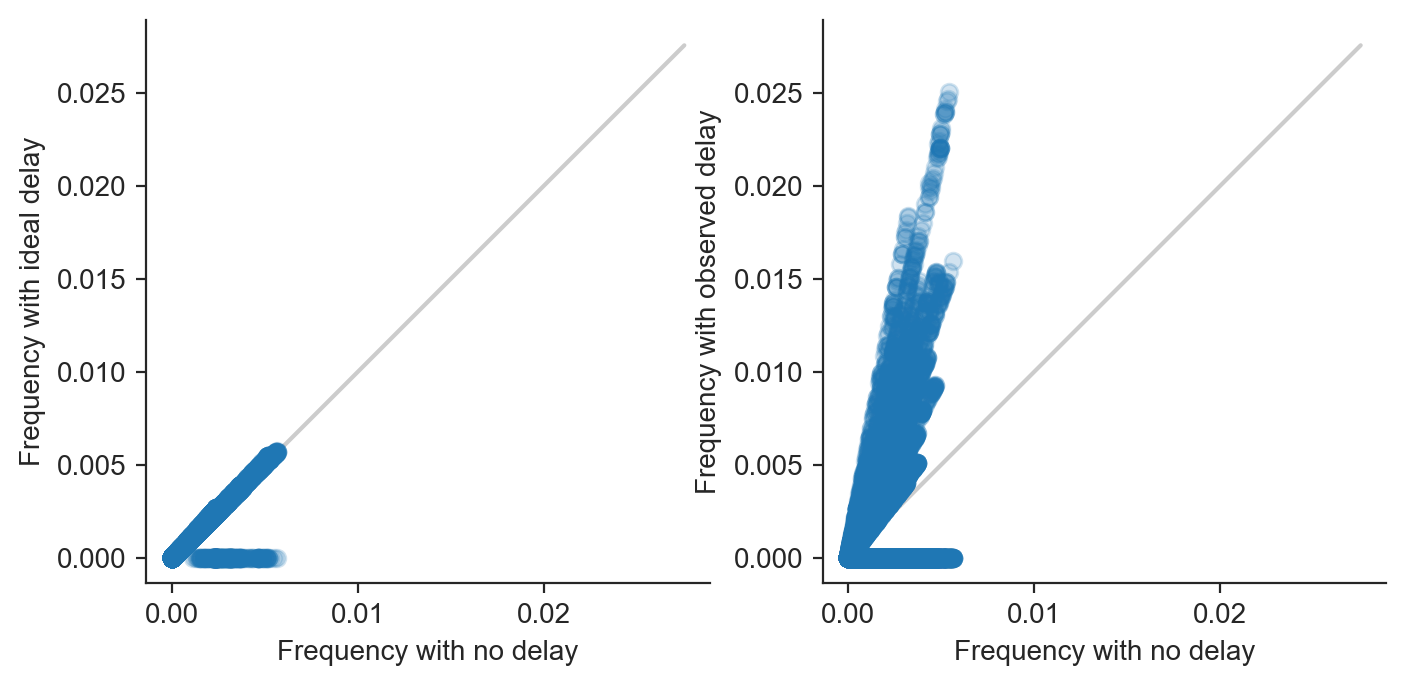

In [71]:
fig, all_axes = plt.subplots(1, 2, figsize=(8, 4), dpi=200)
axes = all_axes.flatten()

axes[0].plot(
    tips["frequency"],
    tips["frequency_ideal"],
    "o",
    alpha=0.2,
)

axes[0].plot(
    x,
    y,
    color="#CCCCCC",
    zorder=-10,
)

axes[0].set_xlabel("Frequency with no delay")
axes[0].set_ylabel("Frequency with ideal delay")

axes[0].set_aspect('equal', 'box')

axes[1].plot(
    tips["frequency"],
    tips["frequency_realistic"],
    "o",
    alpha=0.2,
)

axes[1].plot(
    x,
    y,
    color="#CCCCCC",
    zorder=-10,
)

axes[1].set_xlabel("Frequency with no delay")
axes[1].set_ylabel("Frequency with observed delay")

axes[1].set_aspect('equal', 'box')

sns.despine()

## Compare clade frequencies

In [27]:
clades = tips.groupby(["timepoint", "clade_membership"]).agg({
    "frequency": "sum",
    "frequency_ideal": "sum",
    "frequency_realistic": "sum",
})

In [28]:
clades

frequency  frequency_ideal  frequency_realistic
timepoint  clade_membership                                                 
2011-04-01 011f34d            0.012287         0.009018             0.010905
           0382549            0.004903         0.005025             0.003937
           0617c14            0.000051         0.000052             0.000152
           067a64e            0.000037         0.000037             0.000000
           0c93977            0.004746         0.004865             0.000000
...                                ...              ...                  ...
2019-10-01 f89a011            0.000056         0.000058             0.000086
           f97776e            0.005358         0.005532             0.004150
           fabbc79            0.000206         0.000212             0.000316
           fd49bfd            0.002104         0.002171             0.003248
           ffcc244            0.004587         0.004735             0.007081

[5090 rows x 3 columns]

In [29]:
max_clade_frequency = clades.loc[:, ["frequency", "frequency_ideal", "frequency_realistic"]].max().max()

In [30]:
max_clade_frequency_threshold = max_clade_frequency + (max_clade_frequency / 10)

In [31]:
x_clades = y_clades = np.linspace(0, max_clade_frequency_threshold, 10)

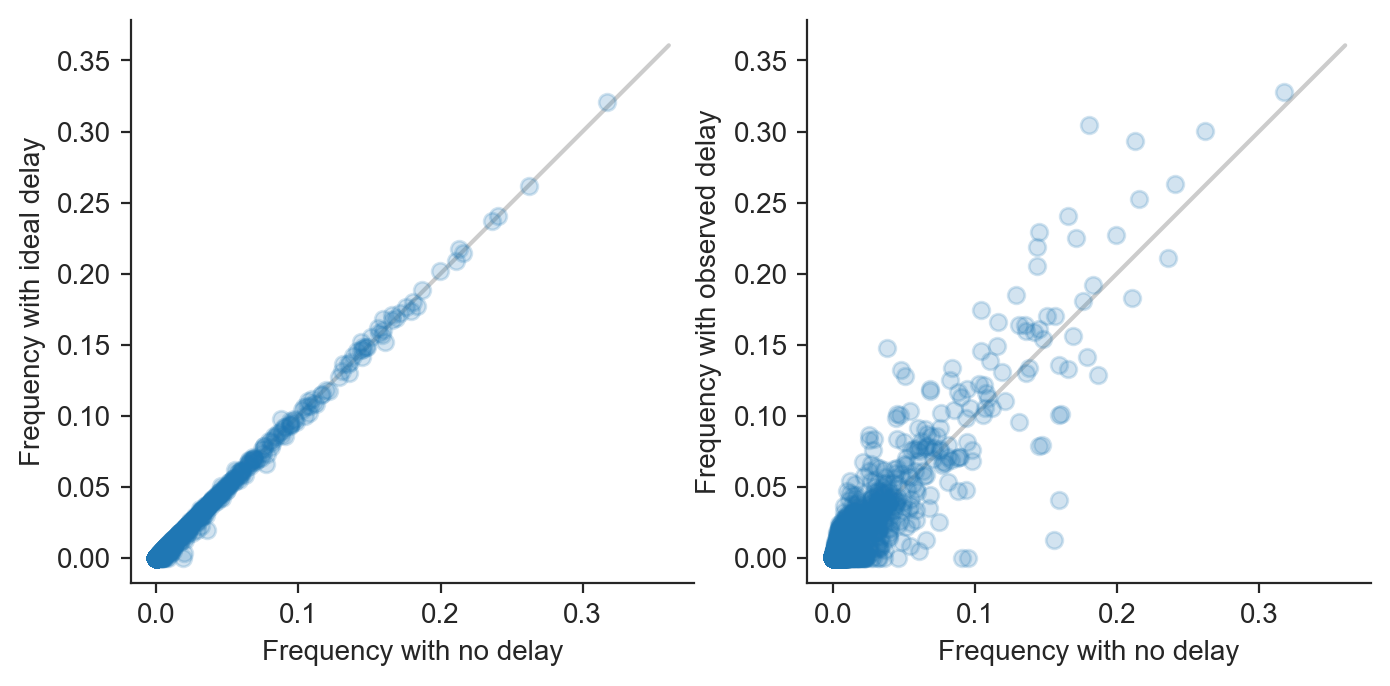

In [70]:
fig, all_axes = plt.subplots(1, 2, figsize=(8, 4), dpi=200)
axes = all_axes.flatten()

axes[0].plot(
    clades["frequency"],
    clades["frequency_ideal"],
    "o",
    alpha=0.2,
)

axes[0].plot(
    x_clades,
    y_clades,
    color="#CCCCCC",
    zorder=-10,
)

axes[0].set_xlabel("Frequency with no delay")
axes[0].set_ylabel("Frequency with ideal delay")

axes[0].set_aspect('equal', 'box')

axes[1].plot(
    clades["frequency"],
    clades["frequency_realistic"],
    "o",
    alpha=0.2,
)

axes[1].plot(
    x_clades,
    y_clades,
    color="#CCCCCC",
    zorder=-10,
)

axes[1].set_xlabel("Frequency with no delay")
axes[1].set_ylabel("Frequency with observed delay")

axes[1].set_aspect('equal', 'box')

sns.despine()

In [33]:
clades["ideal_error"] = clades["frequency"] - clades["frequency_ideal"]

In [34]:
clades["realistic_error"] = clades["frequency"] - clades["frequency_realistic"]

In [35]:
bins_min = min(clades["ideal_error"].min(), clades["realistic_error"].min())

In [36]:
bins_max = max(clades["ideal_error"].max(), clades["realistic_error"].max())

In [37]:
bins_min

-0.12371699999999997

In [38]:
bins_max

0.143518

In [68]:
bins = np.arange(-0.02, 0.03, 0.005)

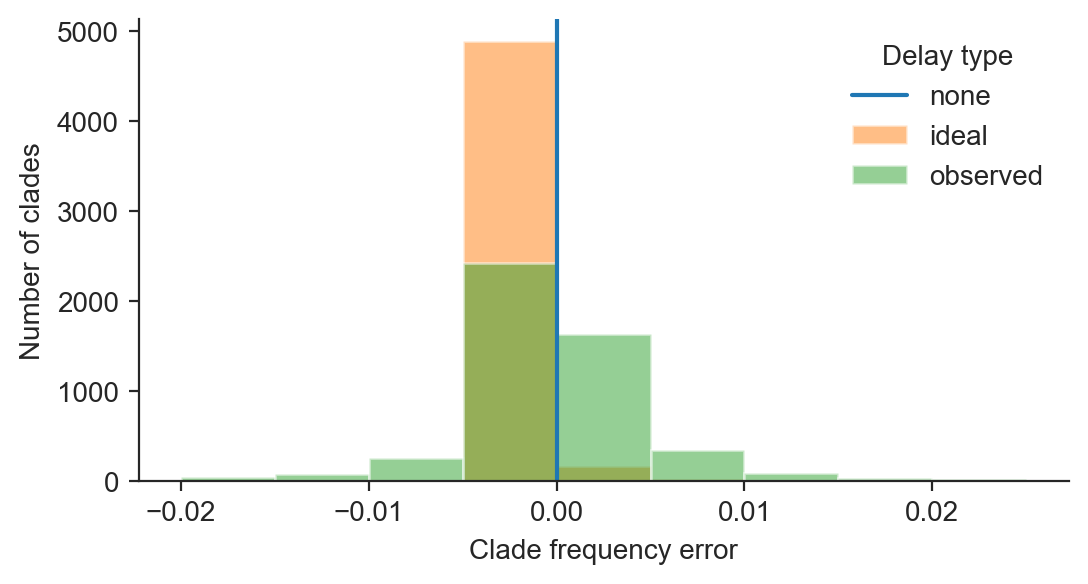

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=200)

ax.axvline(
    x=0,
    label="none",
    color="C0",
)

ax.hist(
    clades["ideal_error"],
    bins=bins,
    label="ideal",
    alpha=0.5,
    color="C1",
)

ax.hist(
    clades["realistic_error"],
    bins=bins,
    label="observed",
    alpha=0.5,
    color="C2",
)

ax.set_xlabel("Clade frequency error")
ax.set_ylabel("Number of clades")

ax.legend(
    title="Delay type",
    frameon=False,
)

sns.despine()

In [45]:
clades["ideal_error"].median()

-2.400000000000004e-05

In [46]:
clades["ideal_error"].mean()

9.390962671903689e-08

In [47]:
clades["ideal_error"].std()

0.0009184442270568365

In [48]:
clades["ideal_error"].var()

8.435397982140299e-07

In [49]:
clades["realistic_error"].median()

-5.100000000000002e-05

In [50]:
clades["realistic_error"].mean()

5.687819253438112e-06

In [51]:
clades["realistic_error"].std()

0.008655517441095457

In [52]:
clades["realistic_error"].var()

7.491798217310764e-05

In [53]:
clades["realistic_error"].var() / clades["ideal_error"].var()

88.81380858582659

In [73]:
bins = np.arange(bins_min, bins_max, 0.005)

In [74]:
large_clades = clades.query("frequency >= 0.05")

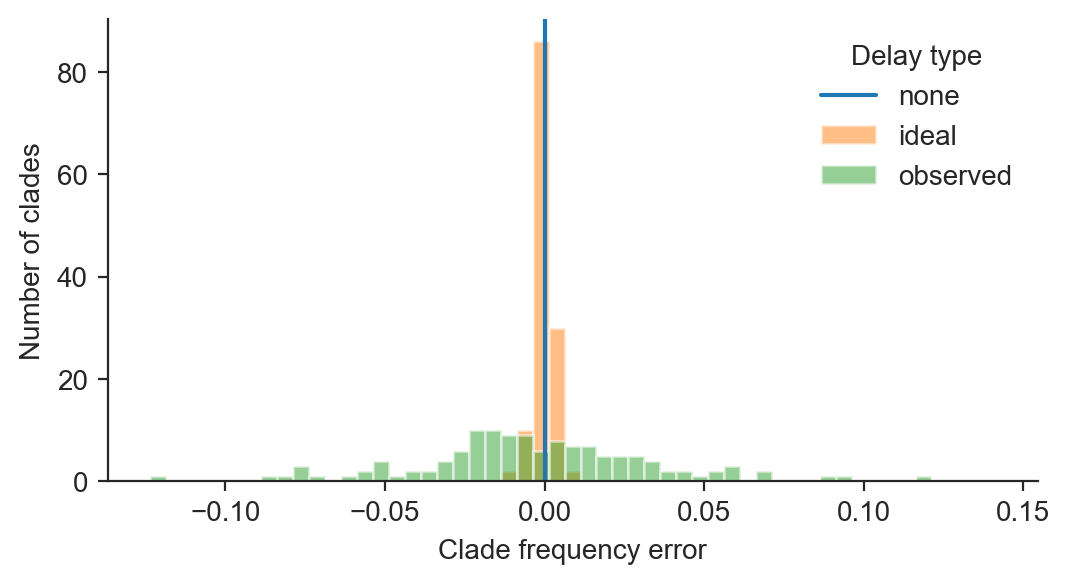

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=200)

ax.axvline(
    x=0,
    label="none",
    color="C0",
)

ax.hist(
    large_clades["ideal_error"],
    bins=bins,
    label="ideal",
    alpha=0.5,
    color="C1",
)

ax.hist(
    large_clades["realistic_error"],
    bins=bins,
    label="observed",
    alpha=0.5,
    color="C2",
)

ax.set_xlabel("Clade frequency error")
ax.set_ylabel("Number of clades")

ax.legend(
    title="Delay type",
    frameon=False,
)

sns.despine()

In [57]:
large_clades["ideal_error"].median()

-0.0007935000000000025

In [58]:
large_clades["ideal_error"].mean()

-0.00041166153846153937

In [59]:
large_clades["ideal_error"].std()

0.003058046621680203

In [60]:
large_clades["ideal_error"].var()

9.351649140369703e-06

In [61]:
large_clades["realistic_error"].median()

-0.00485650000000001

In [62]:
large_clades["realistic_error"].mean()

-0.0017519846153846172

In [63]:
large_clades["realistic_error"].std()

0.039185098747217914

In [64]:
large_clades["realistic_error"].var()

0.0015354719638292188

In [65]:
large_clades["realistic_error"].var() / large_clades["ideal_error"].var()

164.19264033343708

In [76]:
large_clades

frequency  frequency_ideal  frequency_realistic  \
timepoint  clade_membership                                                    
2011-04-01 3b60fb2            0.138273         0.141749             0.133285   
           7909f75            0.054459         0.055825             0.103405   
           c17559e            0.060488         0.062010             0.004823   
           e56a121            0.183300         0.177479             0.192297   
2011-07-01 3b60fb2            0.104107         0.105768             0.174519   
...                                ...              ...                  ...   
2019-10-01 60e614d            0.081418         0.081058             0.070877   
           662771a            0.076935         0.065762             0.065558   
           97366a2            0.060553         0.059684             0.078317   
           f5d75c6            0.075853         0.078299             0.101939   
           f5e6fed            0.141292         0.145849             0.159122   

                             ideal_error  realistic_error  
timepoint  clade_membership                                
2011-04-01 3b60fb2             -0.003476         0.004988  
           7909f75             -0.001366        -0.048946  
           c17559e             -0.001522         0.055665  
           e56a121              0.005821        -0.008997  
2011-07-01 3b60fb2             -0.001661        -0.070412  
...                                  ...              ...  
2019-10-01 60e614d              0.000360         0.010541  
           662771a              0.011173         0.011377  
           97366a2              0.000869        -0.017764  
           f5d75c6             -0.002446        -0.026086  
           f5e6fed             -0.004557        -0.017830  

[130 rows x 5 columns]

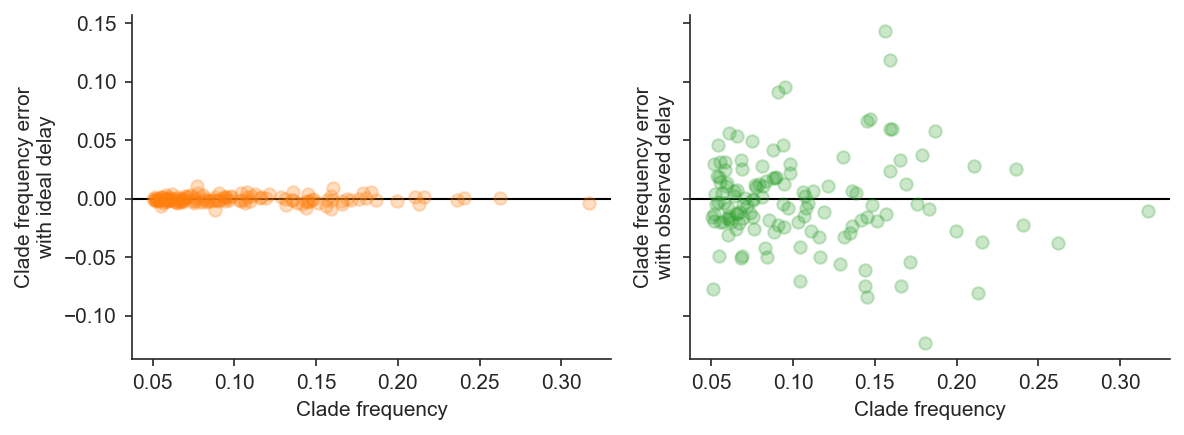

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), dpi=150, sharex=True, sharey=True)

ax1.plot(
    large_clades["frequency"],
    large_clades["ideal_error"],
    "o",
    alpha=0.25,
    color="C1",
)
ax1.axhline(y=0, color="#000000", zorder=-10, linewidth=1)

ax1.set_xlabel("Clade frequency")
ax1.set_ylabel("Clade frequency error\nwith ideal delay")

ax2.plot(
    large_clades["frequency"],
    large_clades["realistic_error"],
    "o",
    alpha=0.25,
    color="C2",
)
ax2.axhline(y=0, color="#000000", zorder=-10, linewidth=1)

ax2.set_xlabel("Clade frequency")
ax2.set_ylabel("Clade frequency error\nwith observed delay")

sns.despine()

plt.tight_layout()